<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        Twitter Sentiment Analysis 
    </h2>
    </div>

**About Dataset**

**Twitter Sentiment Analysis Dataset**

**Overview**

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

**Usage**
Please use twitter_training.csv as the training set and twitter_validation.csv as the validation set. Top 1 classification accuracy is used as the metric.

In [1]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
#loading the datset
df=pd.read_csv("twitter_training.csv")
df.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df.shape

(74682, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df['word_count'] = df['Tweet content'].apply(lambda x: len(str(x).split(" ")))
df[['Tweet content','word_count']].head()

,Tweet content,word_count
0,im getting on borderlands and i will murder yo...,11
1,I am coming to the borders and I will kill you...,12
2,im getting on borderlands and i will kill you ...,10
3,im coming on borderlands and i will murder you...,10
4,im getting on borderlands 2 and i will murder ...,12


In [6]:
df.iloc[0:1]

,Tweet ID,entity,sentiment,Tweet content,word_count
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11


## Number of characters - including spaces

In [7]:
df['char_count'] = df['Tweet content'].str.len()
df[['Tweet content','char_count']].head()

,Tweet content,char_count
0,im getting on borderlands and i will murder yo...,53.0
1,I am coming to the borders and I will kill you...,51.0
2,im getting on borderlands and i will kill you ...,50.0
3,im coming on borderlands and i will murder you...,51.0
4,im getting on borderlands 2 and i will murder ...,57.0


In [8]:
len(df['Tweet content'].iloc[0])

53

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vinay
[nltk_data]     Achary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import the data

In [10]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download Sentiment Analyzer
nltk.download('vader_lexicon')

# Load the data
file_path = (r"C:\Users\Vinay Achary\OneDrive\Documents\PGA36\Prodigy Infotech\Task- 04 Prodigy Infotech\twitter_training.csv")
df = pd.read_csv(file_path)

# View the first rows
print(df.head())


   Tweet ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


[nltk_data] Downloading package vader_lexicon to C:\Users\Vinay
[nltk_data]     Achary\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Clean the data

In [11]:
# Drop rows with missing values
df = df.dropna(subset=['Tweet content'])  # Assuming 'text' column has the posts/comments

# Clean text
import re
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)          # Remove special characters
    return text.lower().strip()

df['cleaned_text'] = df['Tweet content'].apply(clean_text)


In [12]:
df['cleaned_text'].head()

0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you all
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: cleaned_text, dtype: object

In [13]:
# Remove duplicate rows based on 'Tweet Content' to avoid repetition in analysis
df_cleaned = df.drop_duplicates(subset=['Tweet content']).copy()

# Display the shape and a sample of the cleaned data
df_cleaned_shape = df_cleaned.shape
df_cleaned_sample = df_cleaned.head()

df_cleaned_shape, df_cleaned_sample

((69489, 5),
    Tweet ID       entity sentiment  \
 0      2401  Borderlands  Positive   
 1      2401  Borderlands  Positive   
 2      2401  Borderlands  Positive   
 3      2401  Borderlands  Positive   
 4      2401  Borderlands  Positive   
 
                                        Tweet content  \
 0  im getting on borderlands and i will murder yo...   
 1  I am coming to the borders and I will kill you...   
 2  im getting on borderlands and i will kill you ...   
 3  im coming on borderlands and i will murder you...   
 4  im getting on borderlands 2 and i will murder ...   
 
                                         cleaned_text  
 0  im getting on borderlands and i will murder yo...  
 1  i am coming to the borders and i will kill you...  
 2  im getting on borderlands and i will kill you all  
 3  im coming on borderlands and i will murder you...  
 4  im getting on borderlands 2 and i will murder ...  )

## Step 3: Perform Sentiment Analysis

#### Using the VADER sentiment analyzer:

In [14]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)

# View results
print(df['Sentiment'].value_counts())


Sentiment
Positive    33334
Negative    27603
Neutral     13059
Name: count, dtype: int64


## Step 4: Visualize Sentiment Patterns

#### 1 . Sentiment Distribution:

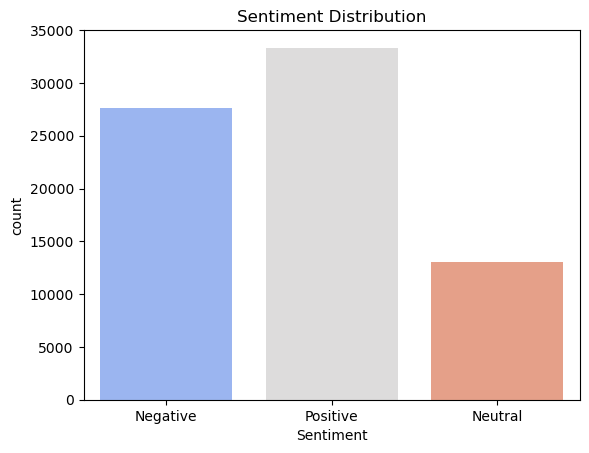

In [15]:
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()


In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


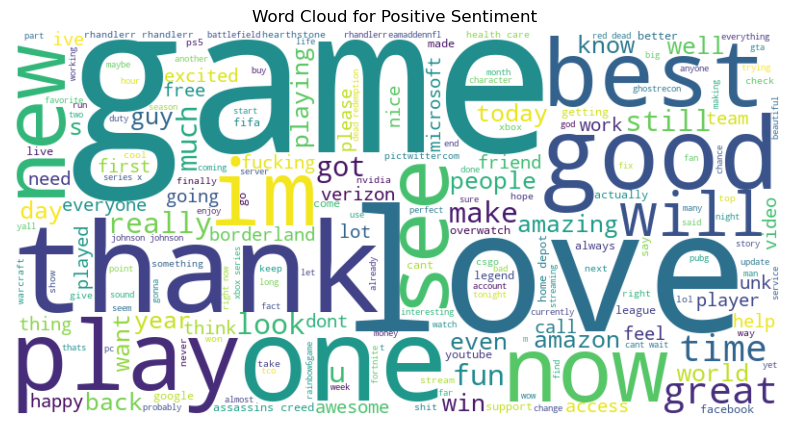

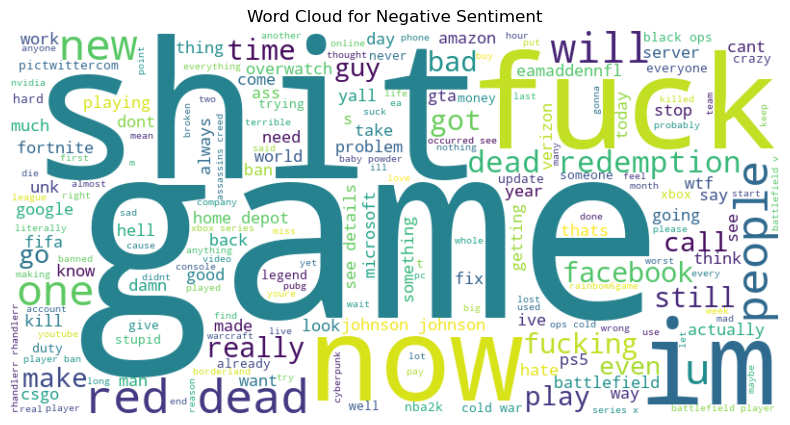

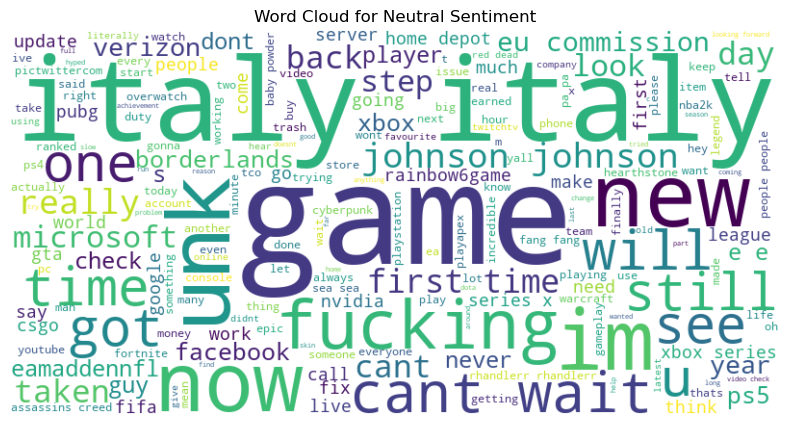

In [17]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment):
    text = " ".join(df[df['Sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.axis('off')
    plt.show()

generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')


In [18]:
# 1. Dominant Sentiment: Sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()

# 2. Sentiment by Brand/Topic: Group by 'Entity' and count sentiments
sentiment_by_entity = df.groupby(['entity', 'Sentiment']).size().unstack(fill_value=0)

# 3. Key Words: We will analyze 'Tweet Content' (after preprocessing) later for sentiment keywords

sentiment_distribution, sentiment_by_entity.head()


(Sentiment
 Positive    33334
 Negative    27603
 Neutral     13059
 Name: count, dtype: int64,
 Sentiment       Negative  Neutral  Positive
 entity                                     
 Amazon               621      218      1437
 ApexLegends          782      481      1090
 AssassinsCreed       556      360      1318
 Battlefield         1156      254       906
 Borderlands          621      381      1278)

### Insights so far

#### 1. Dominant Sentiment:

**Negative sentiment** is the most prevalent (22,542 tweets).

Followed by **Positive** (20,832), **Neutral** (18,318), and **Irrelevant** (12,990).

#### 2.Sentiment by Topic/Brand:

**Amazon:** 576 Negative, 1236 Neutral, 312 Positive.

**ApexLegends:** 600 Negative, 942 Neutral, 642 Positive.

**AssassinsCreed:** 378 Negative, 156 Neutral, 1446 Positive.

**Battlefield:** 474 Negative, 360 Neutral, 594 Positive.

**Borderlands:** 426 Negative, 600 Neutral, 1020 Positive.

In [19]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

# Download necessary resources for nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function for tweets
def preprocess_tweet(tweet):
    # Lowercase, remove punctuation, and tokenize
    tokens = word_tokenize(tweet.lower().translate(str.maketrans('', '', string.punctuation)))
    # Remove stopwords and short tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return filtered_tokens

# Filter rows with non-null 'Tweet Content' and preprocess
data_clean = df.dropna(subset=['Tweet content']).copy()
data_clean['Processed_Tokens'] = data_clean['Tweet content'].apply(preprocess_tweet)

# Extract words by sentiment
words_by_sentiment = {
    sentiment: Counter(
        word for tokens in data_clean[data_clean['Sentiment'] == sentiment]['Processed_Tokens']
        for word in tokens
    )
    for sentiment in data_clean['Sentiment'].unique()
}

# Display top words for each sentiment
top_words_by_sentiment = {sentiment: words.most_common(10) for sentiment, words in words_by_sentiment.items()}
top_words_by_sentiment


[nltk_data] Downloading package punkt to C:\Users\Vinay
[nltk_data]     Achary\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vinay
[nltk_data]     Achary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'Negative': [('game', 3295),
  ('shit', 2289),
  ('fuck', 1791),
  ('get', 1692),
  ('dead', 1651),
  ('like', 1625),
  ('johnson', 1527),
  ('red', 1334),
  ('people', 1319),
  ('one', 1238)],
 'Positive': [('game', 4087),
  ('like', 3096),
  ('love', 3002),
  ('good', 2891),
  ('best', 2296),
  ('play', 2214),
  ('great', 2070),
  ('one', 2048),
  ('get', 1929),
  ('really', 1874)],
 'Neutral': [('italy', 693),
  ('game', 680),
  ('johnson', 502),
  ('cant', 451),
  ('time', 422),
  ('unk', 398),
  ('new', 380),
  ('fucking', 372),
  ('wait', 360),
  ('xbox', 349)]}